## Graded Assessment

### For questions 1, 2, and 3 

- Load the breast cancer dataset from scikit-learn; you can do this by running load_breast_cancer() from sklearn.datasets 
- The target variable here is whether breast cancer was detected or not (use the .target attribute on your dataset to acquire this) 
- Attempt logistic regression on this dataset to predict if breast cancer is detected or not using the default solver 
- Using sklearn.model_selection.train_test_split(), please split the dataset as follows 
- Use an 80:20 train:test split 
- Please set random_state = 9001 so that the results you obtain can be compared to ours 
- Please scale your data using MinMaxScaler() from sklearn.preprocessing 
- Obtain a classification report containing metrics such as accuracy, precision, and recall on this data; you can use classification_report() from sklearn.metrics to achieve this 
 

### For questions 4 and 5 

- Load the diabetes dataset from scikit-learn; you can do this by running load_diabetes() from sklearn.datasets 
- The target variable here is the disease progression score (use the .target attribute on your dataset to acquire this) 
Attempt linear regression on this dataset to predict the disease progression score; you will perform linear regression with 
- No regularisation 
- L1 regularisation (with alpha = 1) 
- L2 regularisation (with alpha = 1) 
- Using sklearn.model_selection.train_test_split(), please split the dataset as follows 
- Use an 80:20 train:test split 
- Please set random_state = 9001 so that the results you obtain can be compared to ours 
- Please scale your data using MinMaxScaler() from sklearn.preprocessing 
- Obtain the mean squared error (MSE) for all three models using the appropriate function from sklearn.metrics 
- Obtain the coefficients of your fitted models by using their .coef_ attribute 

In [52]:
from sklearn.datasets import load_breast_cancer, load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import MinMaxScaler

from IPython.display import display

from warnings import filterwarnings
filterwarnings('ignore')

### Breast Cancer Prediction - Logistic Regression

In [53]:
# Load the breast cancer dataset from scikit-learn; you can do this by running load_breast_cancer() from sklearn.datasets 
cancer_data = load_breast_cancer(as_frame=True)
df_cancer = cancer_data.frame
display(df_cancer)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [54]:
# get the target_names attribute from the dataset to see the names of the classes
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [55]:
# The target variable here is whether breast cancer was detected or not (use the .target attribute on your dataset to acquire this) 

X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = pd.Series(cancer_data.target)

print(f'Input shape: {X.shape}')
print(f'Class distribution:')
for i, class_name in enumerate(cancer_data.target_names):
    count = (y == i).sum()
    print(f'  {class_name}: {count} ({count/len(y):.1%})')

print("\nClass distribution using value_counts():")
print(y.value_counts())

print("Target = 0 => Malignant")
print("Target = 1 => Benign")

Input shape: (569, 30)
Class distribution:
  malignant: 212 (37.3%)
  benign: 357 (62.7%)

Class distribution using value_counts():
target
1    357
0    212
Name: count, dtype: int64
Target = 0 => Malignant
Target = 1 => Benign


In [56]:
# Attempt logistic regression on this dataset to predict if breast cancer is detected or not using the default solver 
logistic_model = LogisticRegression(random_state=9001)


In [89]:
# Using sklearn.model_selection.train_test_split(), please split the dataset as follows 
# Use an 80:20 train:test split 
# Please set random_state = 9001 so that the results you obtain can be compared to ours 

# Note: Use stratify=y, to address class imbalance and have same distribution of target 
# variable in training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=9001)
print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

print(f'Training set class distribution: {np.bincount(y_train)}')
print(f'Test set class distribution: {np.bincount(y_test)}')

Training set shape: (455, 30)
Test set shape: (114, 30)
Training set class distribution: [170 285]
Test set class distribution: [42 72]


In [90]:
# Please scale your data using MinMaxScaler() from sklearn.preprocessing 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the logistic regression model on the training data and predict on the test data
logistic_model.fit(X_train_scaled, y_train)

# Make y predictions on the test data and store them in a variable called y_pred_logistic
y_pred_logistic = logistic_model.predict(X_test_scaled)



In [91]:
# Obtain a classification report containing metrics such as accuracy, precision, and recall on this data; 
# you can use classification_report() from sklearn.metrics to achieve this 

report = classification_report(y_test, y_pred_logistic, target_names=cancer_data.target_names)
print(report)
print("\nAccuracy:", accuracy_score(y_test, y_pred_logistic))
print("Precision:", precision_score(y_test, y_pred_logistic))
print("Recall:", recall_score(y_test, y_pred_logistic))
print("F1 Score:", f1_score(y_test, y_pred_logistic))
cm = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix:\n", cm)

              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Accuracy: 0.956140350877193
Precision: 0.958904109589041
Recall: 0.9722222222222222
F1 Score: 0.9655172413793104
Confusion Matrix:
 [[39  3]
 [ 2 70]]


In [92]:
# Get coefficients
coef = logistic_model.coef_[0]

# Rank features by absolute coefficient magnitude
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": coef,
    "abs_coefficient": abs(coef)
}).sort_values(by="abs_coefficient", ascending=False)

print(coef_df.head(10))  # top 10 strongest features

                 feature  coefficient  abs_coefficient
20          worst radius    -2.379557         2.379557
27  worst concave points    -2.333994         2.333994
21         worst texture    -2.169682         2.169682
22       worst perimeter    -2.168315         2.168315
23            worst area    -1.940119         1.940119
7    mean concave points    -1.783235         1.783235
0            mean radius    -1.740449         1.740449
2         mean perimeter    -1.712651         1.712651
6         mean concavity    -1.514329         1.514329
1           mean texture    -1.494990         1.494990


### Dibetis Disease Progression Score Prediction - Linear Regression

In [77]:
# Load the diabetes dataset from scikit-learn; you can do this by running load_diabetes() from sklearn.datasets 

diabetes_data = load_diabetes(as_frame=True)
df_dibetes  = diabetes_data.frame   
display(df_dibetes)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [78]:
# The target variable here is the disease progression score (use the .target attribute on your dataset to acquire this) 
X_diabetes = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
y_diabetes = pd.Series(diabetes_data.target)

print (f"Input shape: {X_diabetes.shape}")
print (f"Target statistics:")
print(f'  Mean: {y_diabetes.mean():.2f}')
print(f'  Std: {y_diabetes.std():.2f}')
print(f'  Min: {y_diabetes.min():.2f}')
print(f'  Max: {y_diabetes.max():.2f}')


Input shape: (442, 10)
Target statistics:
  Mean: 152.13
  Std: 77.09
  Min: 25.00
  Max: 346.00


In [79]:
# Attempt linear regression on this dataset to predict the disease progression score; you will perform linear regression with 


In [80]:
# Using sklearn.model_selection.train_test_split(), please split the dataset as follows 
# Use an 80:20 train:test split
# Please set random_state = 9001 so that the results you obtain can be compared to ours
X_train_diab, X_test_diab, y_train_diab, y_test_diab = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=9001)
print(f'Training set shape: {X_train_diab.shape}')
print(f'Test set shape: {X_test_diab.shape}')

Training set shape: (353, 10)
Test set shape: (89, 10)


In [81]:
# Please scale your data using MinMaxScaler() from sklearn.preprocessing 
scaler_diab = MinMaxScaler()
X_train_diab_scaled = scaler_diab.fit_transform(X_train_diab)
X_test_diab_scaled = scaler_diab.transform(X_test_diab)

In [82]:
# No regularisation 
lr_model = LinearRegression()
lr_model.fit(X_train_diab_scaled, y_train_diab)
y_pred_diab_linear = lr_model.predict(X_test_diab_scaled)

In [83]:
# L1 regularisation (with alpha = 1) 
lasso_model = Lasso(alpha=1, random_state=9001)
lasso_model.fit(X_train_diab_scaled, y_train_diab)
y_pred_diab_lasso = lasso_model.predict(X_test_diab_scaled) 


In [84]:
# L2 regularisation (with alpha = 1) 
ridge_model = Ridge(alpha=1, random_state=9001)
ridge_model.fit(X_train_diab_scaled, y_train_diab)
y_pred_diab_ridge = ridge_model.predict(X_test_diab_scaled)

In [85]:
# Obtain the mean squared error (MSE) for all three models using the appropriate function from sklearn.metrics 
mse_linear = mean_squared_error(y_test_diab, y_pred_diab_linear)
mse_lasso = mean_squared_error(y_test_diab, y_pred_diab_lasso)
mse_ridge = mean_squared_error(y_test_diab, y_pred_diab_ridge)

print("Mean Squared Error (MSE):")
print(f"Linear Regression (No regularisation): {mse_linear:.2f}")
print(f"Lasso Regression (L1, alpha=1): {mse_lasso:.2f}")
print(f"Ridge Regression (L2, alpha=1): {mse_ridge:.2f}")

Mean Squared Error (MSE):
Linear Regression (No regularisation): 2839.66
Lasso Regression (L1, alpha=1): 3066.58
Ridge Regression (L2, alpha=1): 2914.91


In [86]:
# Obtain the coefficients of your fitted models by using their .coef_ attribute 
print (f"Model Coefficients:")
print(f"\nLinear Regression Coefficients:")

features_diab = diabetes_data.feature_names
coef_linear = lr_model.coef_
coef_lasso = lasso_model.coef_
coef_ridge = ridge_model.coef_

all_coef = pd.DataFrame({
            'feature' : features_diab,
            'linear_coef': coef_linear,
            'lasso_coef' : coef_lasso,
            'ridge_coef' : coef_ridge
        })

display(all_coef)

Model Coefficients:

Linear Regression Coefficients:


,feature,linear_coef,lasso_coef,ridge_coef
0,age,-9.017396,-0.000000,-6.726054
1,sex,-19.227353,-7.034736,-18.777937
2,bmi,124.150965,121.012406,117.778952
3,bp,81.827676,57.382246,78.640646
4,s1,-207.799754,-0.000000,-24.044456
5,s2,115.732936,-0.000000,-18.399865
6,s3,40.323603,-42.473776,-42.662907
7,s4,60.420372,0.000000,40.573186
8,s5,178.651061,111.777904,108.938513
9,s6,25.882092,3.475959,28.734270


---------

**Q1) What is the accuracy of the logistic regression model?**

**Answer: 0.96**

**Q2) in breast cancer logistic regression model, assume you have obtained a coefficient of X for the feature symmetry_error. what does this mean?**
- a) a one-unit increase in 'symmetry error' decreases the log-odds of the tumour being benign by X 
- b) a one-unit increase in 'symmetry error' changes the log-odds of the tumour being benign by X 
- c) a one-unit increase in 'symmetry error' increases the probability of the tunour being benign by X% 
- d) a one-unit increase in 'symmetry error' increases the tumour's predicted value by X

**Answer: b**

Logistic Regression Equation

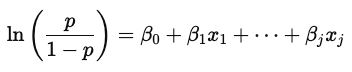

- Left-hand side = log-odds of the positive class (say, tumour is benign).
- Each coefficient 𝛽𝑗 = change in log-odds for a 1-unit increase in feature 𝑥𝑗

- a) a one-unit increase in 'symmetry error' decreases the log-odds of the tumour being benign by X
- ❌ Not always true. It’s only correct if X is negative. The sign matters.

- b) a one-unit increase in 'symmetry error' changes the log-odds of the tumour being benign by X
- ✅ Correct. This is the general interpretation of logistic regression coefficients.

- c) a one-unit increase in 'symmetry error' increases the probability of the tumour being benign by X%
- ❌ Wrong. The effect on probability is nonlinear, depends on the baseline p. You can’t directly say “X%” without context.

- d) a one-unit increase in 'symmetry error' increases the tumour's predicted value by X
- ❌ Sounds like linear regression, not logistic regression. Logistic regression doesn’t predict directly on the same scale as features.


**Q3) how to find which feature has the highest magnitude coefficient (i.e. strongest influence on the prediction, regardless of sign)**
- a) mean fractal dimension 
- b) area error 
- c) mean perimeter 
- d) worst radius

**Answer: d**

```python
# Get coefficients
coef = log_reg.coef_[0]

# Rank features by absolute coefficient magnitude
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": coef,
    "abs_coefficient": abs(coef)
}).sort_values(by="abs_coefficient", ascending=False)

print(coef_df.head(10))  # top 10 strongest features
```

**Q4) which model has the lowest mean squarred error?**
- **Linear Regression (No regularisation): 2839.66**
- Lasso Regression (L1, alpha=1): 3066.58 
- Ridge Regression (L2, alpha=1): 2914.91

**Q5) how many features has lasso eliminated?**

**Answer: 4**
- Count the features where coefficient is 0